In [ ]:
import numpy as np
import pandas as pd
import random
import os

SEED = 1234
np.random.seed(SEED)
pd.core.common._random_stat = SEED
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
! unzip /content/MyDrive/MyDrive/AppliedAIinBiomedicine/final-assignment/features_complete.zip

Archive:  /content/MyDrive/MyDrive/AppliedAIinBiomedicine/final-assignment/features_complete.zip
  inflating: features_complete.csv   
  inflating: __MACOSX/._features_complete.csv  


In [ ]:
features = pd.read_csv('/content/features_complete.csv', index_col=0)
features.describe()

,PR_interval,QR_interval,rr_intervals,drr_intervals,rr_mean_2_min_window_centered,rr_std_2_min_window_centered,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,drr_std_5_min_window_centered,rmssd_5_min_window_centered,rr_mean_2_min_before,rr_std_2_min_window_before,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,rr_mean_5_min_window_before,rr_std_5_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before,max_corrs_win_4,lag_max_corrs_win_4,max_corrs_win_20,lag_max_corrs_win_20
count,210965.000000,188303.000000,1714.000000,1712.000000,198660.000000,198660.000000,198660.000000,198660.000000,198660.000000,177336.000000,1.773360e+05,177336.000000,177336.000000,198606.000000,198606.000000,198606.000000,198606.000000,198606.000000,177057.000000,177057.000000,177057.000000,177057.000000,177057.000000,212572.000000,212572.000000,210412.000000,210412.000000
mean,0.148584,0.275726,1.049580,-0.000208,0.760666,0.073845,-0.000107,0.109588,0.767652,0.078118,7.191758e-07,0.113666,0.768120,0.761576,0.067092,-0.000195,0.102928,0.768094,0.762522,0.072146,-0.000034,0.107970,0.769496,13.091457,25.461679,13.026445,25.477563
std,0.202605,0.093774,0.062507,0.028625,0.171898,0.084254,0.007310,0.136120,0.177266,0.084124,4.608158e-03,0.134700,0.176273,0.174772,0.087979,0.014650,0.143758,0.181153,0.173256,0.087744,0.009124,0.141190,0.179547,16.909313,41.834657,16.481153,41.710051
min,-12.312500,0.068000,0.628000,-0.432000,0.250355,0.001949,-0.524858,0.002853,0.253028,0.002943,-3.382353e-01,0.003906,0.256250,0.249645,0.000000,-1.168750,0.000000,0.250311,0.247098,0.001561,-0.682904,0.002255,0.249004,0.000684,-74.000000,0.013689,-74.000000
25%,0.164062,0.209469,1.024000,-0.012000,0.638951,0.017584,-0.001420,0.017138,0.642764,0.022462,-9.411765e-04,0.019208,0.643723,0.637714,0.012956,-0.002545,0.014573,0.641350,0.638139,0.015880,-0.001736,0.016383,0.642100,2.244225,-3.000000,2.242081,-3.000000
50%,0.192000,0.304000,1.056000,0.000000,0.750930,0.051774,0.000000,0.065859,0.756529,0.059113,0.000000e+00,0.079369,0.757539,0.750154,0.032959,0.000000,0.035148,0.755533,0.750781,0.046431,0.000000,0.054311,0.756109,8.414843,6.000000,8.352982,6.000000
75%,0.224000,0.343750,1.088000,0.012000,0.885530,0.105996,0.001385,0.162664,0.892802,0.107148,9.302326e-04,0.163920,0.894389,0.886719,0.099724,0.002404,0.155827,0.893595,0.889323,0.104317,0.001645,0.161539,0.896282,17.817314,66.000000,17.720483,66.000000
max,0.695312,0.609375,1.224000,0.596000,2.540865,2.988946,0.551711,4.258109,3.748766,2.338192,3.314732e-01,3.201504,2.889515,4.556641,4.623242,1.429688,7.673220,6.491328,2.882812,3.486445,0.833705,5.117447,4.444366,652.306495,268.000000,452.248197,232.000000


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(features, test_size=0.25, random_state=SEED, shuffle=True, stratify=features['target'])

train_target = train.target
train_features = train.drop(columns='target')

test_target = test.target
test_features = test.drop(columns='target')

In [ ]:
train_features.describe()

,PR_interval,QR_interval,rr_intervals,drr_intervals,rr_mean_2_min_window_centered,rr_std_2_min_window_centered,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,drr_std_5_min_window_centered,rmssd_5_min_window_centered,rr_mean_2_min_before,rr_std_2_min_window_before,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,rr_mean_5_min_window_before,rr_std_5_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before,max_corrs_win_4,lag_max_corrs_win_4,max_corrs_win_20,lag_max_corrs_win_20
count,158229.000000,141231.000000,1305.000000,1.303000e+03,149061.000000,149061.000000,149061.000000,149061.000000,149061.000000,132958.000000,132958.000000,132958.000000,132958.000000,148929.000000,148929.000000,148929.000000,148929.000000,148929.000000,132818.000000,132818.000000,132818.000000,132818.000000,132818.000000,159421.000000,159421.000000,157796.000000,157796.000000
mean,0.149006,0.275745,1.049891,-1.504221e-04,0.760622,0.073855,-0.000106,0.109594,0.767636,0.078115,0.000004,0.113688,0.768009,0.761445,0.067073,-0.000218,0.102869,0.767983,0.762403,0.072130,-0.000046,0.107934,0.769398,13.107848,25.462223,13.037825,25.466666
std,0.202234,0.093845,0.061672,3.029910e-02,0.171967,0.084889,0.007334,0.136768,0.177519,0.084623,0.004661,0.135352,0.176563,0.175179,0.089309,0.014403,0.145389,0.182109,0.173480,0.088672,0.008888,0.142431,0.180128,17.049378,41.844666,16.537492,41.714728
min,-12.312500,0.068000,0.628000,-4.320000e-01,0.250533,0.001949,-0.524858,0.002853,0.253190,0.002943,-0.338235,0.003906,0.256250,0.249645,0.000000,-1.168750,0.000000,0.250311,0.247098,0.001561,-0.682904,0.002255,0.249004,0.000684,-72.000000,0.016698,-74.000000
25%,0.164062,0.208000,1.024000,-1.200000e-02,0.638672,0.017573,-0.001400,0.017106,0.642635,0.022398,-0.000930,0.019168,0.643551,0.637277,0.012941,-0.002545,0.014558,0.641227,0.637818,0.015854,-0.001736,0.016343,0.641832,2.250181,-3.000000,2.246243,-3.000000
50%,0.192000,0.304000,1.056000,2.842171e-14,0.750901,0.051696,0.000000,0.065771,0.756500,0.059087,0.000000,0.079352,0.757476,0.750154,0.032883,0.000000,0.034996,0.755486,0.750400,0.046327,0.000000,0.053973,0.755981,8.427759,6.000000,8.367355,6.000000
75%,0.224000,0.343750,1.088000,1.200000e-02,0.885417,0.105897,0.001395,0.162626,0.892622,0.107139,0.000941,0.163994,0.894264,0.886719,0.099655,0.002404,0.155678,0.893242,0.888889,0.104375,0.001645,0.161721,0.895994,17.834752,66.000000,17.742852,66.000000
max,0.687500,0.568000,1.220000,5.960000e-01,2.540865,2.944563,0.255729,4.103390,3.626088,2.294856,0.331473,3.134095,2.834308,4.556641,4.623242,0.583984,7.673220,6.491328,2.882812,3.486445,0.394531,5.117447,4.444366,652.306495,268.000000,452.248197,232.000000


In [ ]:
#replace nan values with zeros
for key in train_features.keys():
  train_features[key] = train_features[key].fillna(0)

In [ ]:
train_features.head()

,PR_interval,QR_interval,rr_intervals,drr_intervals,rr_mean_2_min_window_centered,rr_std_2_min_window_centered,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,drr_std_5_min_window_centered,rmssd_5_min_window_centered,rr_mean_2_min_before,rr_std_2_min_window_before,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,rr_mean_5_min_window_before,rr_std_5_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before,max_corrs_win_4,lag_max_corrs_win_4,max_corrs_win_20,lag_max_corrs_win_20
194952,0.196000,0.184000,0.0,0.0,0.588000,0.085189,-0.001429,0.143253,0.594139,0.000000,0.000000,0.000000,0.000000,0.591429,0.086399,0.000571,0.145247,0.597706,0.593043,0.068058,0.002087,0.113413,0.596936,28.332666,79.0,27.188629,80.0
36740,0.179688,0.000000,0.0,0.0,0.657986,0.672569,0.005787,0.982834,0.940901,0.532602,-0.004084,0.776887,0.820071,0.528125,0.069104,-0.004167,0.128400,0.532627,0.538086,0.072671,-0.012044,0.116665,0.542971,71.465338,-11.0,72.885354,-11.0
39070,0.125000,0.203125,0.0,0.0,0.446970,0.011175,0.000000,0.014521,0.447109,0.010490,0.000300,0.014451,0.447389,0.440717,0.009305,0.000460,0.015503,0.440815,0.442007,0.008979,0.000601,0.014684,0.442098,0.602791,-24.0,0.708067,-24.0
83317,0.156250,0.351562,0.0,0.0,0.750000,0.181430,-0.020132,0.291474,0.771633,0.186284,0.000953,0.297302,0.765763,0.707933,0.194229,-0.025240,0.307566,0.734094,0.680432,0.180292,0.007440,0.306911,0.703912,67.563248,8.0,73.594425,8.0
24980,0.210938,0.257812,0.0,0.0,0.757500,0.114383,0.002188,0.191322,0.766087,0.101895,0.002148,0.169407,0.763084,0.770182,0.146730,0.010417,0.247553,0.784035,0.774219,0.124802,0.005859,0.211946,0.784213,2.190587,6.0,2.484710,6.0


In [ ]:
# do the same for the test data
for key in test_features.keys():
  test_features[key] = test_features[key].fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


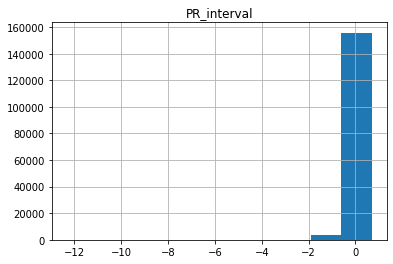

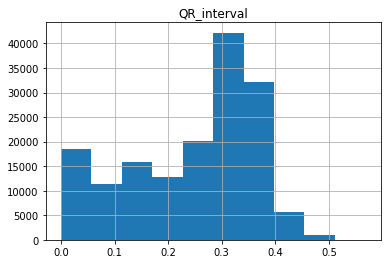

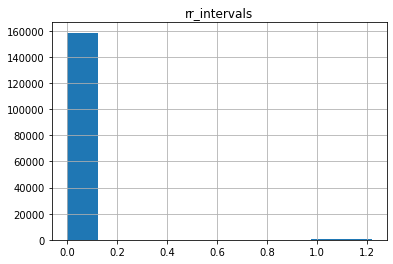

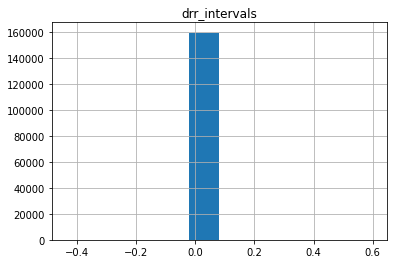

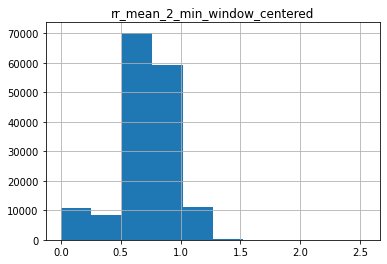

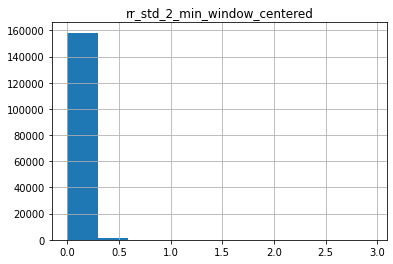

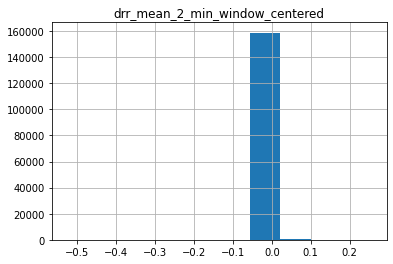

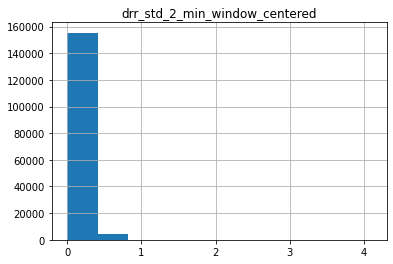

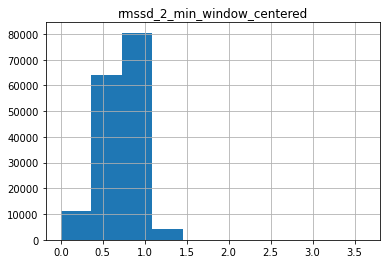

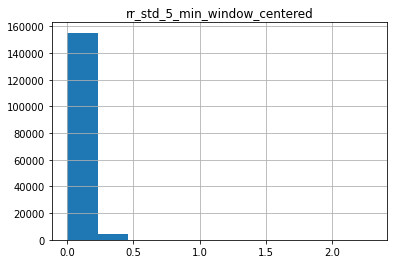

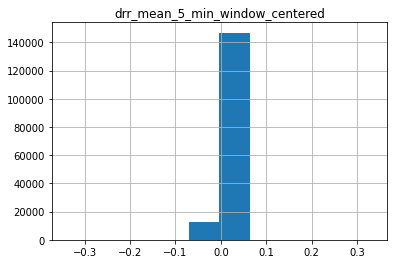

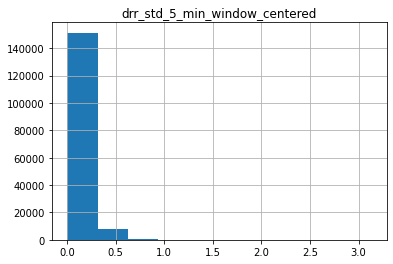

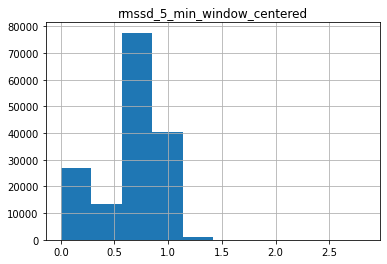

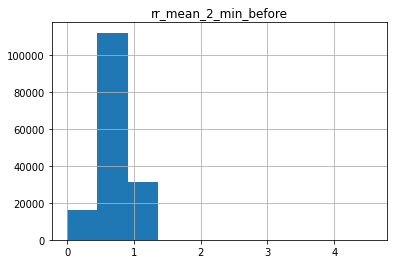

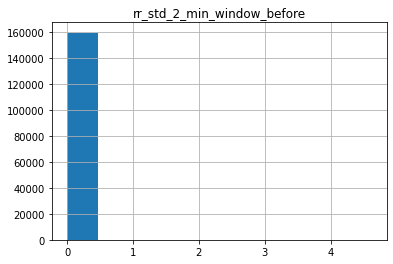

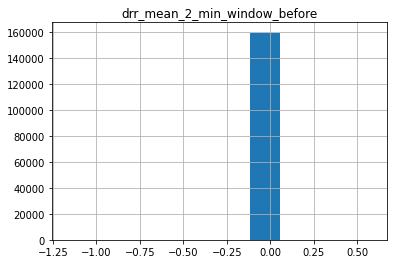

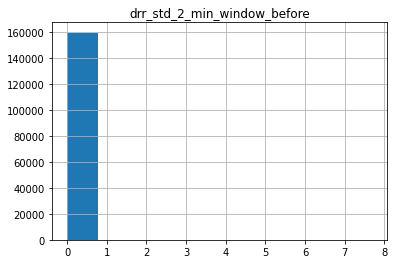

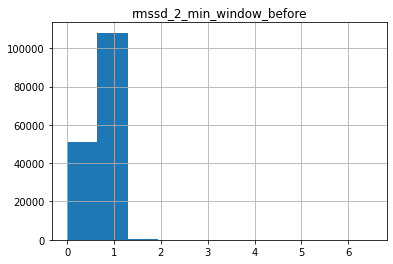

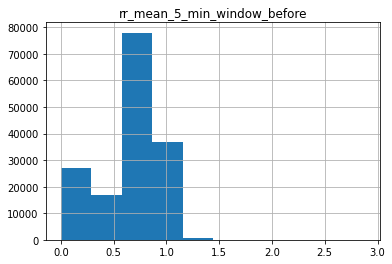

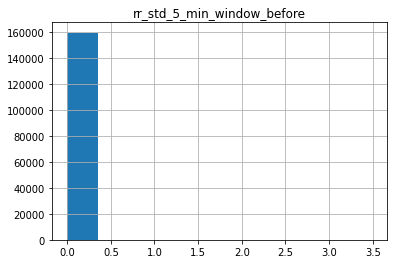

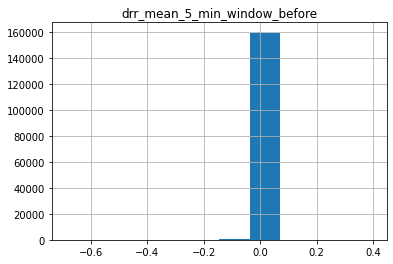

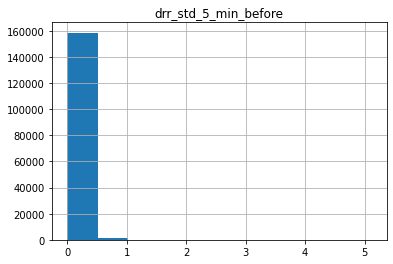

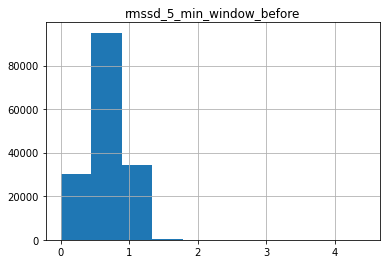

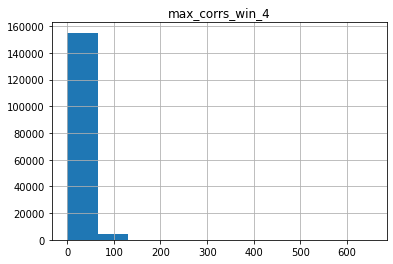

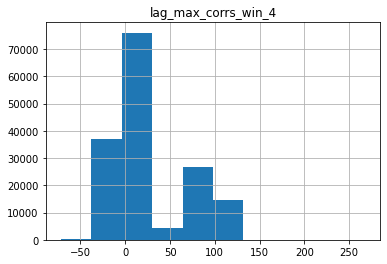

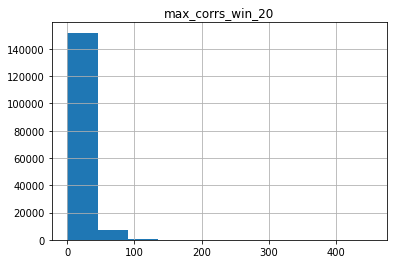

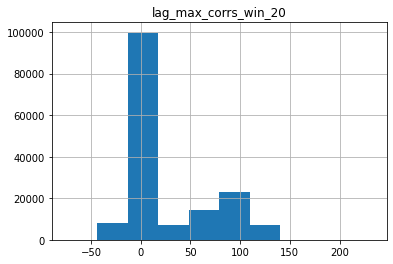

In [ ]:
for column in train_features.columns:
  train_features.hist(column=column)

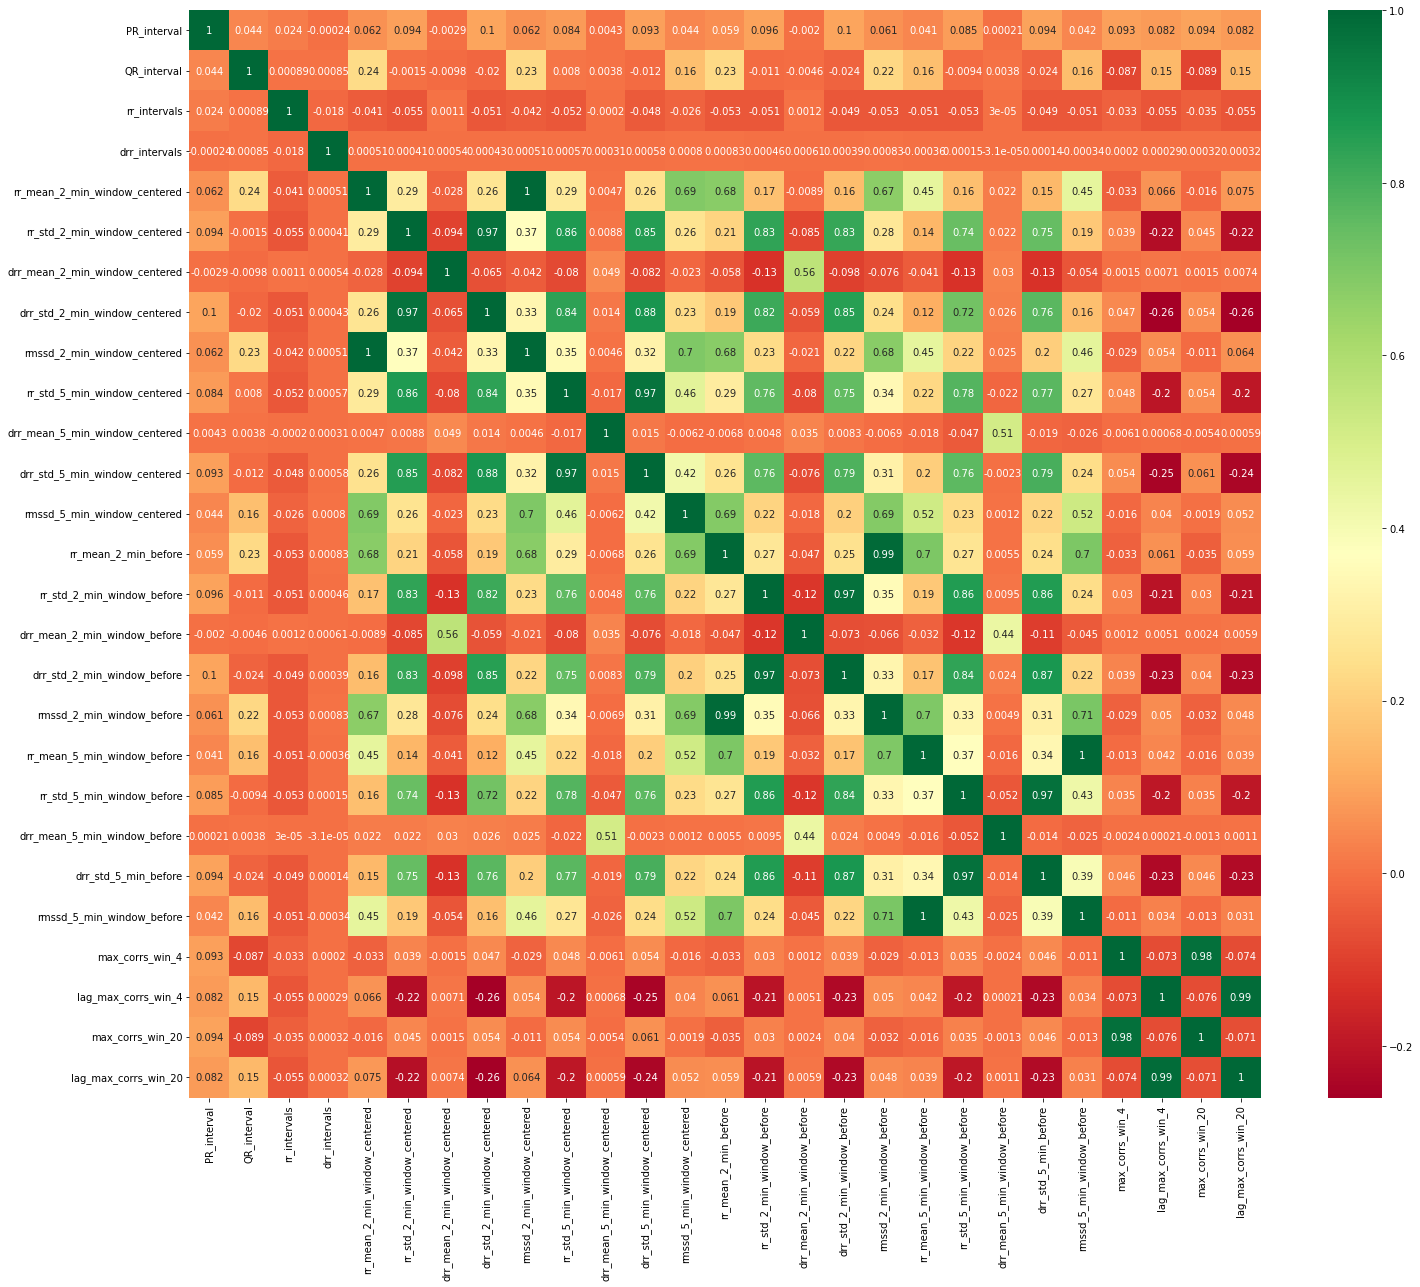

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(train_features.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

# Resampling

Run this part only if you want to use resampling (it overwrites the training data)

In [ ]:
!pip install imbalanced-learn

In [ ]:
# Perform resampling over the dataset to balance classes
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn. datasets import make_classification
from imblearn. under_sampling import RandomUnderSampler

# summarize class distribution
print(Counter(train_target))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform (applied 2 times to balance all classes)
train_features, train_target = undersample.fit_resample(train_features, train_target)
train_features, train_target = undersample.fit_resample(train_features, train_target)
# summarize class distribution
print(Counter(train_target))

Counter({'N': 147014, 'S': 6989, 'V': 5765})
Counter({'N': 5765, 'S': 5765, 'V': 5765})


In [ ]:
# Check new size of the set
train_features.shape

(17295, 27)

# Normalize and train baseline model

In [ ]:
# 2. Standarize data with RobustScaler transformation
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(train_features)
features_list = train_features.columns.tolist()
train_features_zscore = transformer.transform(train_features)
#Transform the numpy array back to a dataframe
train_features = pd.DataFrame(data=train_features_zscore, columns=features_list)
train_features.describe()

,PR_interval,QR_interval,rr_intervals,drr_intervals,rr_mean_2_min_window_centered,rr_std_2_min_window_centered,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,drr_std_5_min_window_centered,rmssd_5_min_window_centered,rr_mean_2_min_before,rr_std_2_min_window_before,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,rr_mean_5_min_window_before,rr_std_5_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before,max_corrs_win_4,lag_max_corrs_win_4,max_corrs_win_20,lag_max_corrs_win_20
count,159768.000000,159768.000000,159768.000000,159768.000000,159768.000000,1.597680e+05,159768.000000,159768.000000,1.597680e+05,159768.000000,159768.000000,1.597680e+05,159768.000000,159768.000000,159768.000000,159768.000000,1.597680e+05,1.597680e+05,159768.000000,159768.000000,159768.000000,1.597680e+05,159768.000000,1.597680e+05,159768.000000,159768.000000,159768.000000
mean,-0.740487,-0.231917,0.008576,-0.000001,-0.100901,2.890775e-01,-0.041037,0.394983,-9.586968e-02,0.285594,0.002563,4.170768e-01,-0.232110,-0.097329,0.429858,-0.047984,5.010488e-01,-9.270262e-02,-0.226352,0.388554,-0.016372,4.832039e-01,-0.230755,2.997140e-01,0.281260,0.299117,0.281652
std,3.363046,0.638945,0.094663,0.002735,0.964837,9.751710e-01,2.946877,0.958253,9.683713e-01,0.990385,3.302674,9.775135e-01,1.111008,0.964186,1.063863,3.281789,1.067664e+00,9.765560e-01,1.101124,1.037815,3.457424,1.044894e+00,1.118501,1.093477e+00,0.606029,1.066696,0.611055
min,-208.408333,-1.479527,0.000000,-0.432000,-2.812391,-5.103877e-01,-218.340909,-0.331242,-2.790475e+00,-0.494490,-262.726348,-2.911778e-01,-2.389697,-2.776035,-0.327205,-275.832073,-2.162190e-01,-2.769439e+00,-2.364590,-0.341498,-291.372549,-2.061358e-01,-2.387944,-5.395175e-01,-1.130435,-0.533451,-1.176471
25%,-0.466667,-0.759757,0.000000,0.000000,-0.476570,-3.407167e-01,-0.500000,-0.228399,-4.736996e-01,-0.345052,-0.494299,-2.054833e-01,-0.483279,-0.476280,-0.194356,-0.508321,-1.222929e-01,-4.739690e-01,-0.484753,-0.229003,-0.500000,-1.272540e-01,-0.482318,-3.967363e-01,-0.130435,-0.397785,-0.132353
50%,0.000000,0.000000,0.000000,0.000000,0.000000,-4.025376e-17,0.000000,0.000000,-2.088546e-16,0.000000,0.000000,-2.597236e-17,0.000000,0.000000,0.000000,0.000000,-1.297587e-17,2.075612e-16,0.000000,0.000000,0.000000,1.332722e-17,0.000000,-5.698965e-17,0.000000,0.000000,0.000000
75%,0.533333,0.240243,0.000000,0.000000,0.523430,6.592833e-01,0.500000,0.771601,5.263004e-01,0.654948,0.505701,7.945167e-01,0.516721,0.523720,0.805644,0.491679,8.777071e-01,5.260310e-01,0.515247,0.770997,0.500000,8.727460e-01,0.517682,6.032637e-01,0.869565,0.602215,0.867647
max,8.258333,1.427703,1.220000,0.596000,6.895990,3.365349e+01,106.383333,28.812986,1.085233e+01,27.043779,257.473861,2.317070e+01,7.178374,14.420525,55.653669,137.823846,5.718008e+01,2.150215e+01,7.361103,42.106257,168.333333,3.910897e+01,12.601301,4.131539e+01,3.797101,28.707089,3.323529


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def plot_confusionMatrix(test_labels, test_predicted, clf):
  cm = confusion_matrix(test_labels, test_predicted, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['N', 'V', 'S'])
  disp.plot()
  plt.show()
  return 
  
def test_model(train_features, train_labels, test_features, test_labels, clf):
  clf.fit(train_features, train_labels)

  # Predict test labels
  test_predicted = clf.predict(test_features)

  # plot confusion matrix
  plot_confusionMatrix(test_labels, test_predicted, clf)

  # display classification results
  print(classification_report(test_labels, test_predicted, target_names=['N', 'V', 'S']))

In [ ]:
"Training a Baseline Model"
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
logisticRegression = LogisticRegression(random_state=SEED, class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=SEED)

score = cross_val_score(logisticRegression, train_features, train_target, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise', verbose=1)
print(np.mean(score))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.42322462103698877


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


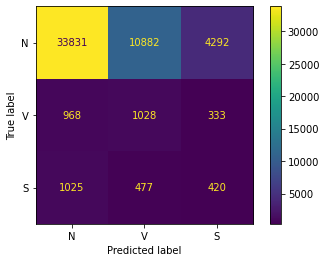

              precision    recall  f1-score   support

           N       0.94      0.69      0.80     49005
           V       0.08      0.44      0.14      2329
           S       0.08      0.22      0.12      1922

    accuracy                           0.66     53256
   macro avg       0.37      0.45      0.35     53256
weighted avg       0.88      0.66      0.74     53256



In [ ]:
test_model(train_features, train_target, test_features, test_target, logisticRegression)

# boxplot of max correlations feature just to check (it is a bad boxplot)

In [ ]:
max_corrs20_N = []
max_corrs20_V = []
max_corrs20_S = []

max_corrs20 = train_features['max_corrs_win_20'].tolist()
label = train_target.tolist()

for i in range(len(max_corrs20)):
  if label[i] == 'N':
    max_corrs20_N.append(max_corrs20[i])
  elif label[i] == 'V':
    max_corrs20_V.append(max_corrs20[i])
  else:
    max_corrs20_S.append(max_corrs20[i])

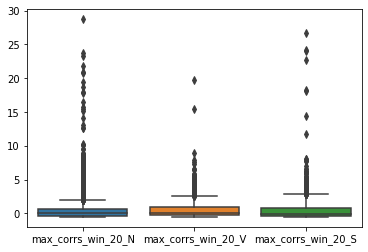

In [ ]:
boxplot_dictionary_max_corr20 = dict( max_corrs_win_20_N = max_corrs20_N, max_corrs_win_20_V = max_corrs20_V, max_corrs_win_20_S = max_corrs20_S )
df_corrs = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in boxplot_dictionary_max_corr20.items() ]))
sns.boxplot(data = df_corrs)

# Principal Component Analysis

In [ ]:
"Perform Principal Components Analysis (PCA)"

#utility function used to plot the data points in the new space defined by pca
def plot_PCAanalysis(train_features_pca, pc_plot):
  principalComponents_Df = pd.DataFrame(data = train_features_pca[:,pc_plot],
                                      columns = ['principal component 1', 'principal component 2'])
  plt.figure()
  plt.figure(figsize=(10,10))
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=14)
  plt.xlabel('Principal Component - 1',fontsize=20)
  plt.ylabel('Principal Component - 2',fontsize=20)
  plt.title("Principal Component Analysis",fontsize=20)
  targets = ['N', 'V', 'S']
  colors = ['r', 'g', 'b']
  for target, color in zip(targets,colors):
    indicesToKeep = np.array(train_target) == target
    plt.scatter(principalComponents_Df.loc[indicesToKeep, 'principal component 1']
                , principalComponents_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

  plt.legend(targets,prop={'size': 15})
  return 

(159768, 5)
(53256, 5)


<Figure size 432x288 with 0 Axes>

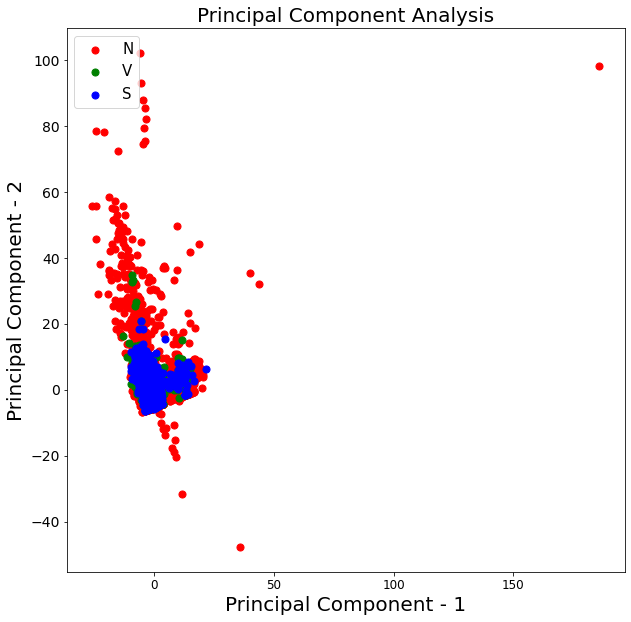

In [ ]:
from sklearn.decomposition import PCA

varianceThreshold = 0.80
pca_features = PCA(n_components = varianceThreshold, random_state= 1234)
pca_features.fit(train_features)

train_features_pca = pca_features.transform(train_features)
print(np.shape(train_features_pca))

# decide components to show
pc_plot = [2, 3]

plot_PCAanalysis(train_features_pca, pc_plot)

# adapt test set
test_features_pca = pca_features.transform(test_features)
print(np.shape(test_features_pca))

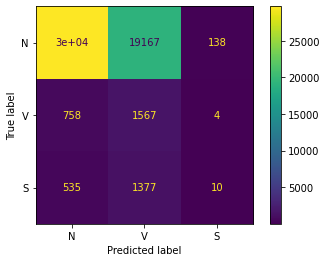

              precision    recall  f1-score   support

           N       0.96      0.61      0.74     49005
           V       0.07      0.67      0.13      2329
           S       0.07      0.01      0.01      1922

    accuracy                           0.59     53256
   macro avg       0.36      0.43      0.29     53256
weighted avg       0.89      0.59      0.69     53256



In [ ]:
# use new pca space and look for changes in results
test_model(train_features_pca, train_target, test_features_pca, test_target, logisticRegression)

# Eliminate correlated features

Execute only if want to eliminate correlated features, it overwrites the data

In [ ]:
def plot_correlationMatrix(correlation_matrix, features):
    f = plt.figure(figsize=(10, 8))
    plt.matshow(correlation_matrix, fignum=f.number)
    plt.xticks(range(len(features)), features, fontsize=10, rotation=90)
    plt.yticks(range(len(features)), features, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16)
    # plt.tight_layout()
    return 

Deleted features: {'rr_std_2_min_window_centered', 'rr_mean_2_min_before', 'rr_std_5_min_window_before', 'drr_std_5_min_window_centered', 'lag_max_corrs_win_4', 'max_corrs_win_4', 'rr_mean_5_min_window_before', 'rr_mean_2_min_window_centered', 'rr_std_2_min_window_before'}


,PR_interval,QR_interval,rr_intervals,drr_intervals,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,rmssd_5_min_window_centered,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before,max_corrs_win_20,lag_max_corrs_win_20
71547,0.132812,0.265625,0.0,0.0,-0.000279,0.116338,0.622272,0.064393,-0.003196,0.633784,-0.013393,0.098752,0.618006,-0.009233,0.079170,0.635145,5.527531,-2.0
198820,0.160000,0.324000,0.0,0.0,-0.003077,0.022960,0.713330,0.032199,-0.000976,0.708439,-0.000615,0.022068,0.722982,0.000800,0.030242,0.722584,2.921359,115.0
116804,-0.453125,0.000000,0.0,0.0,0.000000,0.013206,0.587537,0.000000,0.000000,0.000000,0.000000,0.014764,0.575415,-0.000679,0.014915,0.577879,0.925333,-5.0
100894,-0.625000,0.289062,0.0,0.0,-0.000326,0.089489,0.785610,0.074202,0.006055,0.786321,-0.003255,0.012939,0.782015,0.009766,0.094911,0.782630,1.599431,-21.0
2174,0.203125,0.101562,0.0,0.0,0.000000,0.012353,0.640399,0.008587,0.000533,0.638375,0.000558,0.013680,0.641801,0.001065,0.013178,0.638219,3.262680,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57530,0.210938,0.093750,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001420,0.023513,1.024971,0.001838,0.022663,1.019892,0.000000,0.0
5973,0.203125,0.351562,0.0,0.0,-0.001302,0.348450,0.897397,0.184256,0.006785,0.891172,-0.006510,0.333137,0.897319,0.001234,0.308207,0.895294,13.634591,4.0
59259,0.179688,0.343750,0.0,0.0,0.000601,0.012805,0.753127,0.017094,-0.000391,0.744337,0.003005,0.013194,0.751979,0.002344,0.011076,0.741665,88.842634,-6.0
181153,0.204000,0.336000,0.0,0.0,0.000308,0.018395,0.727336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.882816,87.0


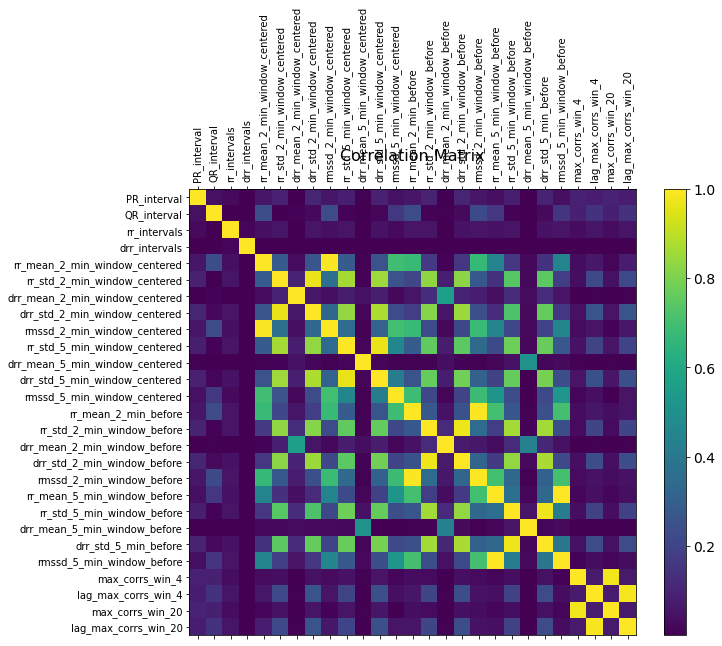

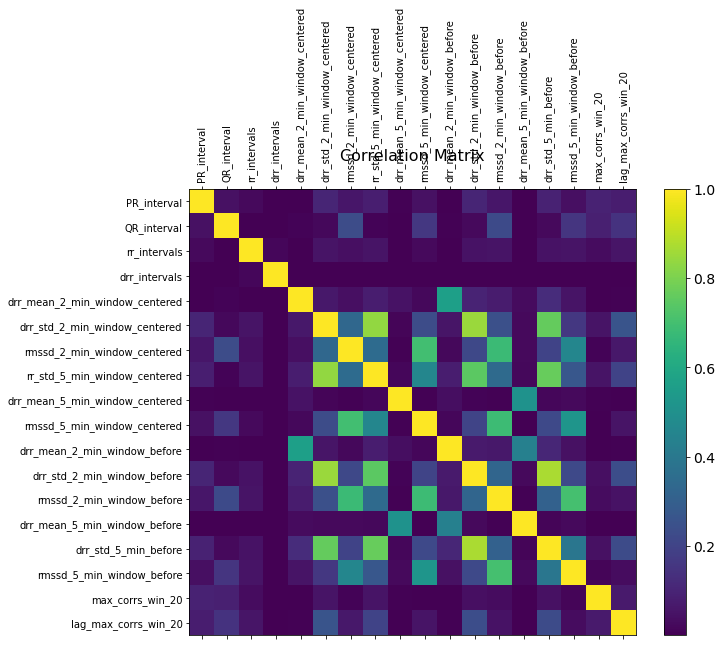

In [ ]:
# visualize correlation matrix

feature_list = train_features.columns.tolist()

cor_matrix = train_features.corr().abs()
plot_correlationMatrix(cor_matrix, feature_list)

# drop correlated features with correlation greater than 0.9
correlated_features = set()
correlation_matrix = train_features.corr()
median_corr = (correlation_matrix.abs()).median(axis=0)

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            if median_corr[i] < median_corr[j]:
                colname = correlation_matrix.columns[i]
            else:
                colname = correlation_matrix.columns[j]
            correlated_features.add(colname)           
train_features.drop(labels=correlated_features, axis=1, inplace=True)
# see how it drops correlated / drop teh one that had a lower correlation w.r to the other feat 
print('Deleted features: ' + str(correlated_features))

# plot correlation matrix with remaining features
cor_matrix = train_features.corr().abs()
feature_list = list(train_features.columns)
f2 = plot_correlationMatrix(cor_matrix, feature_list)

# adapt test set: pick only selected features
test_features = test_features[feature_list]
display(test_features)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


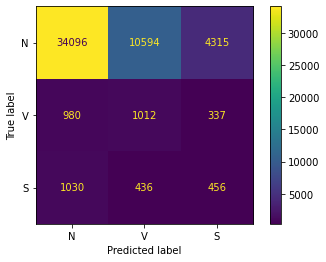

              precision    recall  f1-score   support

           N       0.94      0.70      0.80     49005
           V       0.08      0.43      0.14      2329
           S       0.09      0.24      0.13      1922

    accuracy                           0.67     53256
   macro avg       0.37      0.46      0.36     53256
weighted avg       0.88      0.67      0.75     53256



In [ ]:
# test model without correlated features
test_model(train_features, train_target, test_features, test_target, logisticRegression)

# Estimation of the feature importance using Ensamble Tree

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

randomForest = ExtraTreesClassifier(n_estimators=250, class_weight='balanced', random_state = SEED)
randomForest.fit(train_features, train_target)


ExtraTreesClassifier(class_weight='balanced', n_estimators=250,
                     random_state=1234)

In [ ]:
importances = randomForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in randomForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_features.shape[1]):
    print("%2d. feature %2d %7s (%.3f)" % (f + 1, indices[f], feature_list[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 16 drr_std_2_min_window_before (0.070)
 2. feature 26 lag_max_corrs_win_20 (0.056)
 3. feature 14 rr_std_2_min_window_before (0.054)
 4. feature  7 drr_std_2_min_window_centered (0.054)
 5. feature 15 drr_mean_2_min_window_before (0.050)
 6. feature 24 lag_max_corrs_win_4 (0.050)
 7. feature 25 max_corrs_win_20 (0.047)
 8. feature  5 rr_std_2_min_window_centered (0.047)
 9. feature  1 QR_interval (0.046)
10. feature 23 max_corrs_win_4 (0.045)
11. feature 21 drr_std_5_min_before (0.043)
12. feature 20 drr_mean_5_min_window_before (0.040)
13. feature 13 rr_mean_2_min_before (0.037)
14. feature 11 drr_std_5_min_window_centered (0.036)
15. feature  0 PR_interval (0.035)
16. feature 17 rmssd_2_min_window_before (0.035)
17. feature  4 rr_mean_2_min_window_centered (0.034)
18. feature 19 rr_std_5_min_window_before (0.034)
19. feature  8 rmssd_2_min_window_centered (0.032)
20. feature  9 rr_std_5_min_window_centered (0.031)
21. feature 18 rr_mean_5_min_window_befor

Detection of low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
feature_selection_variance_model = VarianceThreshold(threshold=0.0001)
X_selected_features_variance = feature_selection_variance_model.fit_transform(train_features)


mask = feature_selection_variance_model.get_support() #list of booleans
for feature in feature_list:
  if(mask[features_list.index(feature)] == False):
    print(feature, "Discarded") 

drr_intervals Discarded
drr_mean_2_min_window_centered Discarded
drr_mean_5_min_window_centered Discarded
drr_mean_5_min_window_before Discarded


In [ ]:
logisticRegression = LogisticRegression(random_state=SEED, class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)

score = cross_val_score(logisticRegression, train_features[['drr_std_2_min_window_before','lag_max_corrs_win_20', 'rr_std_2_min_window_before', 'drr_std_2_min_window_centered']], train_target, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise', verbose=1)
print(np.mean(score))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.40165454204799017


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.4min finished
